In [1]:
# Imports
import gzip, sys # as some instance files may have been compressed

# Re-import dependencies (in case earlier import was skipped)
import numpy    as np
from math       import ceil, log2
from matplotlib import pyplot as plt
from itertools  import product


from configs        import EA_Config, Exp_Config
from run_experiment import run_experiments, round_to_multiple, plot_boxplots, to_masked

from permutationsga.qap import QAP, read_qaplib
from permutationsga.ga  import (
    crossover_cx, crossover_pmx, crossover_ox, crossover_ox_neg,
    generate_uniform_indices, generate_sequential_indices
)

In [2]:
pop_sizes = list(2**x for x in range(1, 13))

setups = {
    f"pop_size 2**{int(log2(x))}" : EA_Config(pop_size=x) for x in pop_sizes
}

# setups = {
#     "Identical Decoder"             : IdenticalDecoder(problem),
#     "Inverse Permutation Decoder"   : InvPermDecoder(problem),
#     "Random Keys Decoder"           : RandomKeysDecoder(problem)
# }

exp_cfg = Exp_Config("pop_size", n_experiments=10)

In [3]:
all_fitnesses_overtime, all_iterations, all_total_times, all_iter_times = run_experiments(setups, exp_cfg)

pop_size 2**1
                                                                                                    
pop_size 2**2
                                                                                                    
pop_size 2**3
                                                                                                    
pop_size 2**4
                                                                                                    
pop_size 2**5


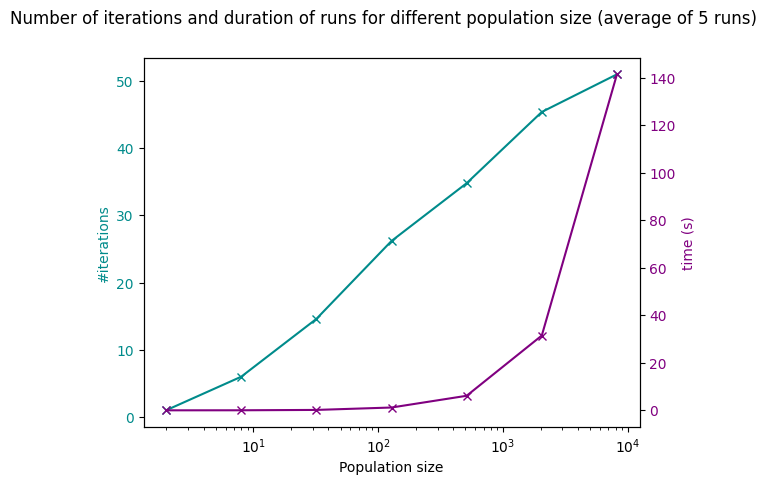

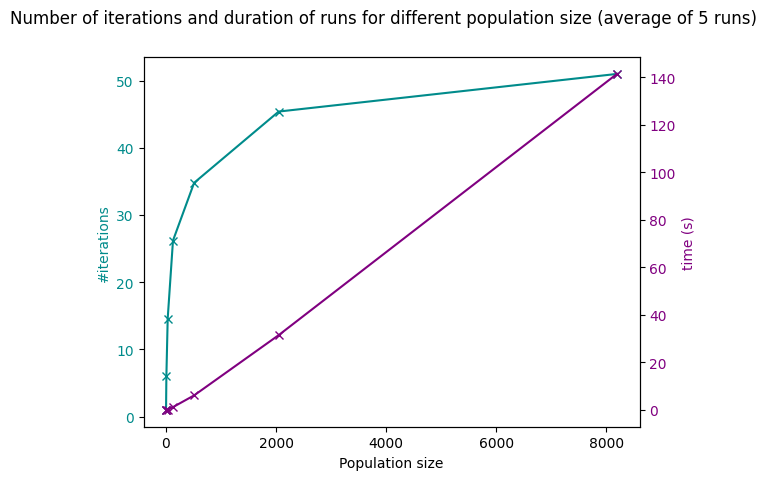

In [18]:
# #iterations and time for pop size (avg 5 runs)

color1, color2 = "darkcyan", "purple"


for scale in ["log", "linear"]:
    fig, ax1 = plt.subplots()
    plt.xscale(scale)
    plt.xlabel("Population size")

    ax1.plot(pop_sizes, all_iterations, color=color1, marker="x")
    ax1.set_ylabel("#iterations", color=color1)
    ax1.tick_params(axis="y", labelcolor=color1)




    ax2 = ax1.twinx()


    ax2.plot(pop_sizes, all_total_times, color=color2, marker="x")
    ax2.set_ylabel("time (s)", color=color2)
    ax2.tick_params(axis="y", labelcolor=color2)




    plt.suptitle(f"Number of iterations and duration of runs for different population size (average of {exp_cfg.n_experiments} runs)")
    plt.show()